### Library-library yang digunakan 

In [26]:
import pandas as pd 
import numpy as np 
from numpy import mean, std
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder 
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

Berikut adalah tampilan 10 baris data yang ada di dalam dataset

In [27]:
df = pd.read_csv('Hasil TES SBK LPDP Gelombang 1 - 2021.csv', encoding ='latin1')
df.head(10)

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
5,Targeted,S2,Luar Negeri,Dev,"Ya, dengan Loa",Ya,17,11,4,KU leuven
6,Afirmasi,S2,Dalam negeri,HUM,Tidak,Ya,17,16,4,Universitas Gadjah Mada
7,Reguler,S2,Dalam negeri,TRP,Tidak,Ya,14,19,4,NaN
8,Reguler,S2,Luar Negeri,AFR,"Ya, dengan Loa",Ya,13,16,7,Uni of Reading
9,Targeted,S3,Luar Negeri,BUS,Tidak,Ya,16,18,8,University of Auckland


In [28]:
# ukuran dari dataset kita. 431 baris dan 10 fitur/kolom
df.shape

(431, 10)

Selanjutnya, disini kita ingin mengecek apakah ada fitur yang memiliki nilai nan didalamnya

In [29]:
df.isnull().sum()

Jenis Beasiswa                                                                           0
Tingkat Pendidikan yang Dituju                                                           0
Negara Tujuan Kuliah                                                                     0
Bidang Studi yang dipilih saat mendaftar                                                 0
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                   0
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?     0
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           0
Jumlah Jawaban Benar pada Tes Kuantitatif                                                0
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          0
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               79
dtype: int64

Dari hasil pengecekan diatas, kita dapat melihat bahwa hampir keseluruhan fitur tidak memiliki nilai null, kecuali pada fitur terakhir yaitu fitur [ [optional] Kampus/universitas tujuan saat ini (pilihan 1)] sebanyak 79 nilai null yang terdeteksi   

Selanjutnya disini kita akan melihat nilai unik yang ada pada setiap fitur untuk mengidentifikasi langkah-langkah apa yang akan kita lakukan dalam melakukan cleaning data

In [30]:
for col in df:
    print(df[col].unique())

['Targeted' 'Reguler' 'Afirmasi']
['S2' 'S3']
['Dalam negeri' 'Luar Negeri']
['TRP' 'ENE' 'ELE' 'LIN' 'Dev' 'HUM' 'AFR' 'BUS' 'WAT' 'MAR' 'SOS' 'HOS'
 'STA' 'EDU' 'DEV' 'ICT' 'LAW' 'SGY' 'ACF' 'IPA' 'PHA' 'FOR' 'COM' 'DEF'
 'PUB' 'SOs' 'ATM' 'ENV' 'ENG' '-' 'CBS' 'CHE' 'KES' 'ECT' 'AER' 'ARC'
 'BIO' 'POL' 'Bus' 'M' 'Afr' 'SOC' 'MED' 'CIV' 'PSY' 'MET' 'ECO' 'Bio'
 'TEK' 'FOO' 'Tra' 'ART' 'ENT' 'Civ' 'TRA' 'GEO' 'LNY' 'BK' 'ETC' 'PHY'
 'INS' 'ACC' 'OCE' 'bus' 'MAT' 'Ipa' 'For' 'BuS' 'EAM' 'NUR' 'PTK' 'ANT'
 'CE' 'Trp' 'TEL' 'EDu' 'Hum' '0' 'arc' 'Psi' 'TP' 'TFM' 'AGB' 'Law' '718']
['Tidak' 'Ya, dengan Loa']
['Ya' 'Tidak']
[10 17 16 15 14 13 20 12 18 19 11  9  7  8 21  6 22  0 23]
[12 22 18  9 11 16 19 15 14 13 17 21  8 20  7 23 10  6 24  0  5  2 25]
[ 6  8  7  4  5  3  9  2 12 10  1  0]
['Universitas Indonesia' 'UCL' 'KTH Sweden' 'UGM'
 'University of Birmingham' 'KU leuven' 'Universitas Gadjah Mada' nan
 'Uni of Reading' 'University of Auckland' 'IHE Delft'
 'University of Michigan' 'Un

Dari hasil diatas, ada beberapa hal yang telah saya pertimbangkan untuk sementara dalam melakukan data cleaning, antara lain:
1. Kita akan mengubah kolom dengan nilai object/string menjadi numerik dengan melakukan encoder
2. Pada kolom indeks 4 dan 10, kita akan menjadikan seluruh huruf tersebut menjadi huruf kecil. Hal ini dikarenakan ada beberapa data yang harusnya berada pada kelas yang sama menjadi berbeda dikarenakan perbedaan huruf besar dan kecil. contoh fitur pada indeks 4 : TRP dan Trp harusnya satu kelas. jika tidak kita satukan maka saat kita melakukan encoder(perubahan data ke numerik), data tersebut akan berada di kelas yang berbeda
3. Pada fitur indeks 4, kita juga dapat melihat bahwa terdapat data dengan nilai yang tidak sesuai (bukan dalam bentuk abjad) seperti, '0', '718', dan '-'. Disini kita juga akan melihat apakah masuk akal data dengan nilai ini jika dilihat hubungannya dengan fitur-fitur lainnya. 

## Melakukan Cleaning Data

Pertama kita akan melakukan sesuatu terhadap nilai null yang ada pada kolom terakhir (indeks ke-10)

Asumsi : Berdasarkan judul dari fitur tersebut yaitu [[optional] Kampus/universitas tujuan saat ini (pilihan 1)], fitur ini memiliki arti bahwa terdapat pilihan optional yang mana setiap murid dapat mengisi ataupun tidak mengisinya. Oleh karena itu, nilai nan disini berkemungkinan besar memiliki arti bahwa ada murid yang masih belum memiliki keputusan untuk menempuh universitas yang ia inginkan. Oleh karena itu, disini saya akan melakukan imputasi nilai null tersebut menjadi string 'belum'.  

#### Melakukan imputasi data dengan replace()

In [31]:
df.iloc[:, -1] = df.iloc[:, -1].replace(np.nan, 'belum')
df.iloc[:, -1].head(10)

0       Universitas Indonesia
1                         UCL
2                  KTH Sweden
3                         UGM
4    University of Birmingham
5                   KU leuven
6     Universitas Gadjah Mada
7                       belum
8              Uni of Reading
9      University of Auckland
Name: [optional] Kampus/universitas tujuan saat ini (pilihan 1), dtype: object

Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan imputasi string 'belum' menggantikan nilai null. 

Selanjutnya, Disini kita akan melihat data yang tidak sesuai (bukan dalam bentuk abjad) yang telah disebutkan sebelumnya pada kolom indeks 4

In [32]:
df.loc[df['Bidang Studi yang dipilih saat mendaftar'].isin(['718', '0','-'])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
54,Afirmasi,S2,Dalam negeri,-,"Ya, dengan Loa",Ya,13,9,6,Universitas Pendidikan Indonesia
123,Targeted,S3,Dalam negeri,-,"Ya, dengan Loa",Ya,10,12,8,Universitas Airlangga
336,Afirmasi,S2,Dalam negeri,0,"Ya, dengan Loa",Ya,6,15,3,UM
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM


In [33]:
df.iloc[:, [6,7,8]].max()

Jumlah Jawaban Benar pada Tes Penalaran Verbal     23
Jumlah Jawaban Benar pada Tes Kuantitatif          25
Jumlah Jawaban Benar pada Tes Pemecahan Masalah    12
dtype: int64

Dari hasil diatas terutama untuk baris 426, kita dapat melihat bahwa jumlah tes untuk penalaran verbal, kuantitatif, dan pemecahan masalah memiliki nilai paling besar di antara keseluruhan data lainnya namun dikategorikan tidak lulus. Dari sini kita dapat melihat bahwa kemungkinan besar bahwa data ini adalah kesalahan input. Oleh karena itu, disini saya menyimpulkan bahwa pada kolom "bidang studi yang dipilih saat mendaftar" dengan nilai '718' adalah missing value. Begitu juga dengan '-' yang mana ketika kita hapus akan menaikkan akurasi model. Oleh karena itu, kita akan menghapus baris yang memiliki missing value. Namun u-ntuk nilai '0' akan tetap dipertahankan karena ketika baris ini dihapus, maka akurasi model mengalami penurunan yang cukup signifikan.

#### Melakukan Marking Data

In [34]:
df['Bidang Studi yang dipilih saat mendaftar'] = df['Bidang Studi yang dipilih saat mendaftar'].replace(['718','-'], np.nan) 

#### Menghapus Missing value

In [35]:
df = df.loc[df['Bidang Studi yang dipilih saat mendaftar'].isin([np.nan]) == False]
df.reset_index(drop = True, inplace = True)

Selanjutnya, disini kita akan mengubah semua huruf yang ada pada fitur bidang studi dan optional kampus pilihan menjadi huruf kecil

In [36]:
df['Bidang Studi yang dipilih saat mendaftar'] = df['Bidang Studi yang dipilih saat mendaftar'].str.lower()
df['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'] = df['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'].str.lower()

### Mengecek data duplikat

In [37]:
# Mengecek data duplikat semua baris yang ada pada dataframe
duplicates = df.iloc[:, 0:].duplicated()

# Memberikan keterangan False jika tidak ada data duplikat dan True jika ada 
print(duplicates.any())

# Menampilkan baris yang memiliki data duplikat 
print(df[duplicates])

True
    Jenis Beasiswa Tingkat Pendidikan yang Dituju Negara Tujuan Kuliah  \
39        Targeted                             S2         Dalam negeri   
121        Reguler                             S2         Dalam negeri   
287       Targeted                             S2          Luar Negeri   
292       Targeted                             S2          Luar Negeri   
337       Afirmasi                             S2         Dalam negeri   
378       Afirmasi                             S2          Luar Negeri   
383       Targeted                             S2         Dalam negeri   
384       Targeted                             S2         Dalam negeri   

    Bidang Studi yang dipilih saat mendaftar  \
39                                       trp   
121                                        m   
287                                      pub   
292                                      soc   
337                                      ipa   
378                                     

Dari hasil diatas, kita dapat melihat bahwa ada 8 baris yang memiliki data duplikat. Oleh karena itu, sekarang kita akan melakukan penghapusan data duplikat tersebut

In [38]:
# Melakukan penghapusan data duplikat 
df.drop_duplicates(inplace=True)

# Menampilkan baris yang memiliki data duplikat 
print(df[duplicates])

Empty DataFrame
Columns: [Jenis Beasiswa, Tingkat Pendidikan yang Dituju, Negara Tujuan Kuliah, Bidang Studi yang dipilih saat mendaftar, Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP, Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?, Jumlah Jawaban Benar pada Tes Penalaran Verbal, Jumlah Jawaban Benar pada Tes Kuantitatif, Jumlah Jawaban Benar pada Tes Pemecahan Masalah, [optional] Kampus/universitas tujuan saat ini (pilihan 1)]
Index: []


<ipython-input-38-5db16c916f7e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[duplicates])


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil menghapus data duplikat tersebut

## Mempersiapkan Model

#### Menentukan Input dan Output

Disini kita akan menggunakan fitur pada indeks 5 (dinyatakan lulus atau tidak) sebagai output dan sisanya sebagai input

In [39]:
X, y = df.iloc[:, [0,1,2,3,4,6,7,8,9]] ,  df.iloc[:, 5]
X.columns

Index(['Jenis Beasiswa', 'Tingkat Pendidikan yang Dituju',
       'Negara Tujuan Kuliah', 'Bidang Studi yang dipilih saat mendaftar',
       'Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP',
       'Jumlah Jawaban Benar pada Tes Penalaran Verbal',
       'Jumlah Jawaban Benar pada Tes Kuantitatif',
       'Jumlah Jawaban Benar pada Tes Pemecahan Masalah',
       '[optional] Kampus/universitas tujuan saat ini (pilihan 1)'],
      dtype='object')

#### Mendefinisikan fitur yang akan ditransformasi

- fitur input pada indeks 0, 1, 4 akan kita encode menggunakan OneHotEncoder()
- fitur input pada indeks 2, 3, 8 akan kita encode menggunakan OrdinalEncoder()
- fitur output akan kita encode menggunakan LabelEncoder()

In [40]:
categorial_or_features= X.iloc[:, [2,3,8]].columns
categorial_oh_features = X.iloc[:, [0,1,4]].columns
y = LabelEncoder().fit_transform(y.astype('str'))

Selanjutnya, disini kita akan memasukkan variabel dari fitur yang akan kita encoder sebelumnya kedalam sebuah list.

In [41]:
trans = [  
           ('oh', OneHotEncoder(), categorial_oh_features),
           ('or', OrdinalEncoder(), categorial_or_features),
        ]

Disini, kita akan menggunakan library ColumnTransformer untuk melakukan transformasi fitur dengan metode encoder yang sudah kita persiapkan sebelumnya 

In [42]:
transformer = ColumnTransformer(transformers = trans, remainder = 'passthrough')
print(X.shape, y.shape)
X = transformer.fit_transform(X)
print(X.shape, y.shape)


(420, 9) (420,)
(420, 13) (420,)


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan transformasi fitur dengan melakukan encoder pada data kategori

### Seleksi Fitur

Selanjutnya, disini kita akan mengidentifikasi score dari setiap fitur yang kita miliki terhadap data output, kemudian kita akan mengambil fitur-fitur dengan score tertinggi. Disini kita akan menggunakan metode chi-square yang mana mayoritas model kita bertipe data kategori.  

Pertama, kita akan mengidenifikasi keseluruhan score fitur terhadap y

Feature 0: 6.206395
Feature 1: 8.801887
Feature 2: 4.831103
Feature 3: 0.158156
Feature 4: 1.119260
Feature 5: 0.037805
Feature 6: 0.082483
Feature 7: 3.287359
Feature 8: 1.825986
Feature 9: 37.659042
Feature 10: 16.206791
Feature 11: 122.547501
Feature 12: 4.323022


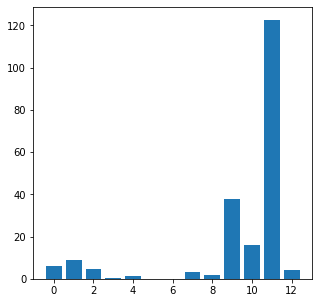

In [43]:
#  membuat sebuah fungsi untuk melakukan seleksi fitur menggunakan metode chi-square
def select_features_(X, y):
    fs_ = SelectKBest(score_func = chi2, k="all")
    fs_.fit(X,y)
    X = fs_.transform(X)
    return X, fs_
X,fs_ = select_features_(X,y)

# Melakukan score dari hasil seleksi fitur yang dilakukan untuk keseluruhan fitur
for i in range(len(fs_.scores_)):
    print('Feature %d: %f' % (i, fs_.scores_[i]))
# plot the scores
plt.figure(figsize=(5, 5))
plt.bar([i for i in range(len(fs_.scores_))], fs_.scores_)
plt.show()


Dari hasil diatas, kita dapat melihat bahwa score paling tinggi dimiliki oleh fitur indeks 11, yang mana fitur tersebut adalah fitur Tes Kuantitatif. Secara keseluruhan, kita dapat melihat terdapat beberapa nilai yang cukup kecil yaitu berada pada score 0-3 (fitur 3,4,5,6,7,8). Oleh karena itu, berdasarkan hasil seleksi fitur ini, kita hanya akan mengambil 7 fitur dengan score terbaik dari 13 fitur yang ada  

Feature 0: 6.206395
Feature 1: 8.801887
Feature 2: 4.831103
Feature 3: 37.659042
Feature 4: 16.206791
Feature 5: 122.547501
Feature 6: 4.323022


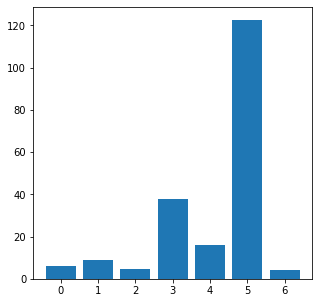

In [45]:
def select_features_(X, y):
    fs_ = SelectKBest(score_func = chi2, k=7)
    fs_.fit(X,y)
    X = fs_.transform(X)
    return X, fs_
X,fs_ = select_features_(X,y)

# what are scores for the features
for i in range(len(fs_.scores_)):
    print('Feature %d: %f' % (i, fs_.scores_[i]))
# plot the scores
plt.figure(figsize=(5, 5))
plt.bar([i for i in range(len(fs_.scores_))], fs_.scores_)
plt.show()


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan seleksi fitur dengan hanya mengambil 7 fitur dengan score terbaik/tertinggi

Selanjutnya, disini kita akan melakukan transformasi fitur terhadap nilai numerik yang ada pada dataset(3 fitur terakhir)
 - Membuat data menjadi lebih gaussian dengan metode yeo-johnson
 - Mengubah distribusi data menjadi uniform dengan n_quantiles = 10

In [46]:
#  mengubah X menjadi dataframe terlebih dahulu
X = pd.DataFrame(X)

#  mendefinisikan fitur yang akan ditransformasi
numerical_features = X.iloc[:, -3:].columns 

#  memasukkan fitur yang telah didefinisikan kedalam sebuah list beserta metode transformasinya
trans = [  
              ('pow', PowerTransformer(method='yeo-johnson'), numerical_features),
              ('qu', QuantileTransformer(n_quantiles=10, output_distribution='uniform'), numerical_features)
        ]


Menggunakan ColumnsTransformer untuk merealisasikan transformasi fitur yang berada dalam list diatas

In [47]:
transformer = ColumnTransformer(transformers = trans, remainder = 'passthrough')
print(X.shape, y.shape)
X = transformer.fit_transform(X)
print(X.shape, y.shape)


(420, 7) (420,)
(420, 10) (420,)


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan transformasi fitur dengan melakukan encoder baik untuk input(X) maupun output(y). Kita dapat melihat bahwa shape awal; (420, 7), (420,) berubah menjadi (420, 10), (420,).

### Menentukan Model untuk melakukan prediksi

Disini kita akan menggunakan model LogisticRegression() untuk melakukan prediksi apakah seorang murid dinyatakan lulus atau tidak berdasarkan input dan output yang telah kita tetapkan sebelumnya

In [48]:
model = LogisticRegression()

Selanjutnya, disini kita akan mengunakan RepeatedStratifiedKFold dengan parameter yang telah ditentukan dibawah ini untuk mencari akurasi dari model yang telah kita buat. Disini kita juga akan menggunakan pipeline untuk menggabungkan StandardScaler() dengan model kita (Intinya kita melakukan scaling dengan StandardScaler() terhadap data yang telah kita olah, dan data hasil scaling tersebut langsung dapat kita cari akurasinya dengan model yang kita gunakan )

In [49]:
# Menggunakan repeatedstratifiedKFold()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state= 1)

#  menggabungkan model dan scaling data yang kita gunakan
pipeline = Pipeline(steps=[('sc', StandardScaler()), ('m', model)])

# Mencari nilai rata-rata akurasi dengan cross_val_score
n_scores = cross_val_score(pipeline, X, y, scoring ='accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.925 (0.042)


Dari hasil diatas, kita dapat melihat bahwa akurasi model kita mencapai 92.5 % dengan standar deviasi 0.042. Disini kita dapat melihat bahwa model kita sudah mendapat akurasi yang cukup tinggi

### Melakukan Prediksi terhadap X

In [50]:
# # Melakukan fitting model terhadap X dan y 
pipeline.fit(X,y)
# Melkaukan prediksi terhadap X
yhat = pipeline.predict(X)
yhat[:16]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

10 data awal untuk y

In [51]:
y[:16]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Dari hasil diatas, kita dapat melihat bahwa untuk 15 baris pertama, model kita dapat memprediksi hasil yang ada pada kolom output sebelumnya(y) dengan benar 